# Streuung


<div>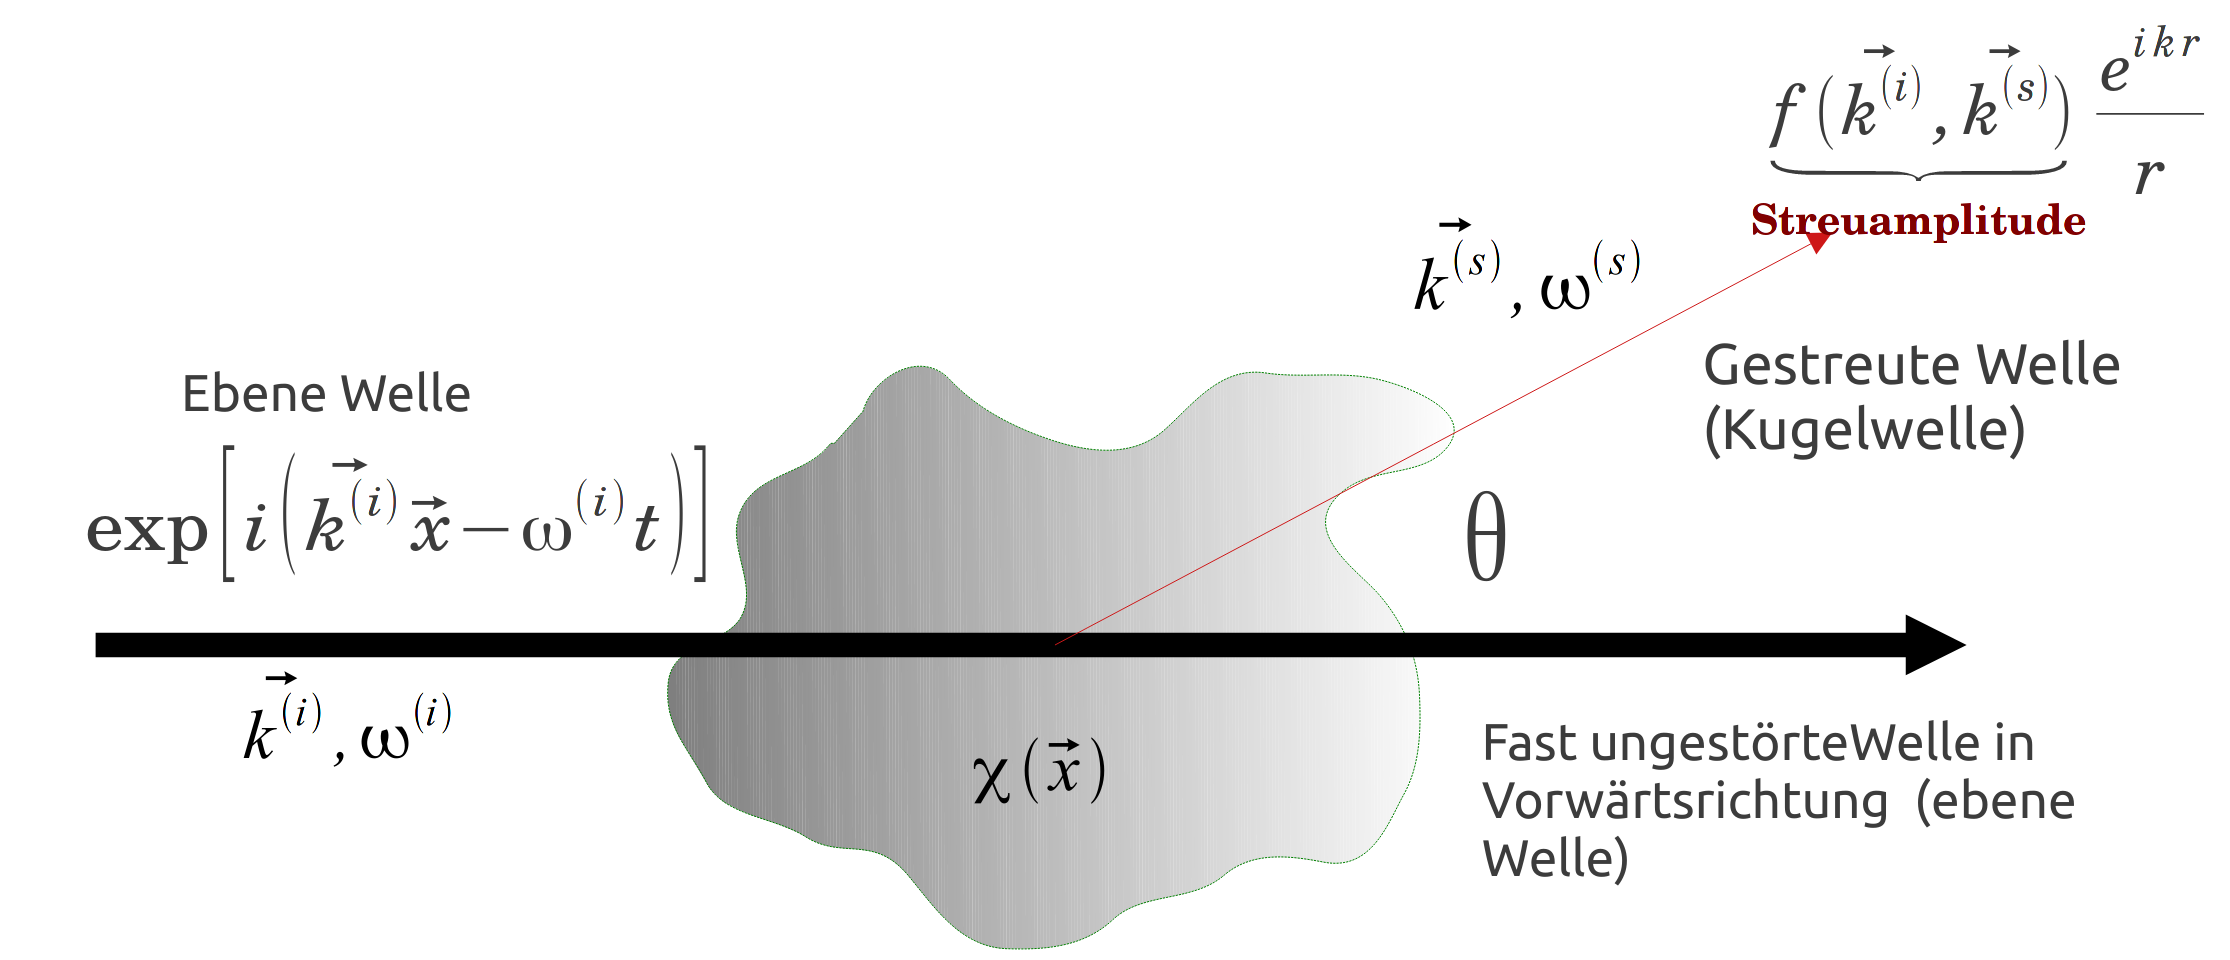</div>

Wellenvektor des einfallenden Strahls: $\vec {k}^{(i)}$  
Wellenvektor des ausgehenden Strahls: $\vec {k}^{(s)}$

Impulsübertrag: $\vec Q =\vec {k}^{(i)} - \vec {k}^{(s)}$

# Laue-Bedingung
Voraussetzung: elastische Streuung ($|\vec {k}^{(i)}| = |\vec {k}^{(s)}| = \frac{2\pi}{\lambda}$)

$\vec Q = \Delta \vec{k} = \vec {k}^{(i)} - \vec {k}^{(s)} = \vec G$

<div>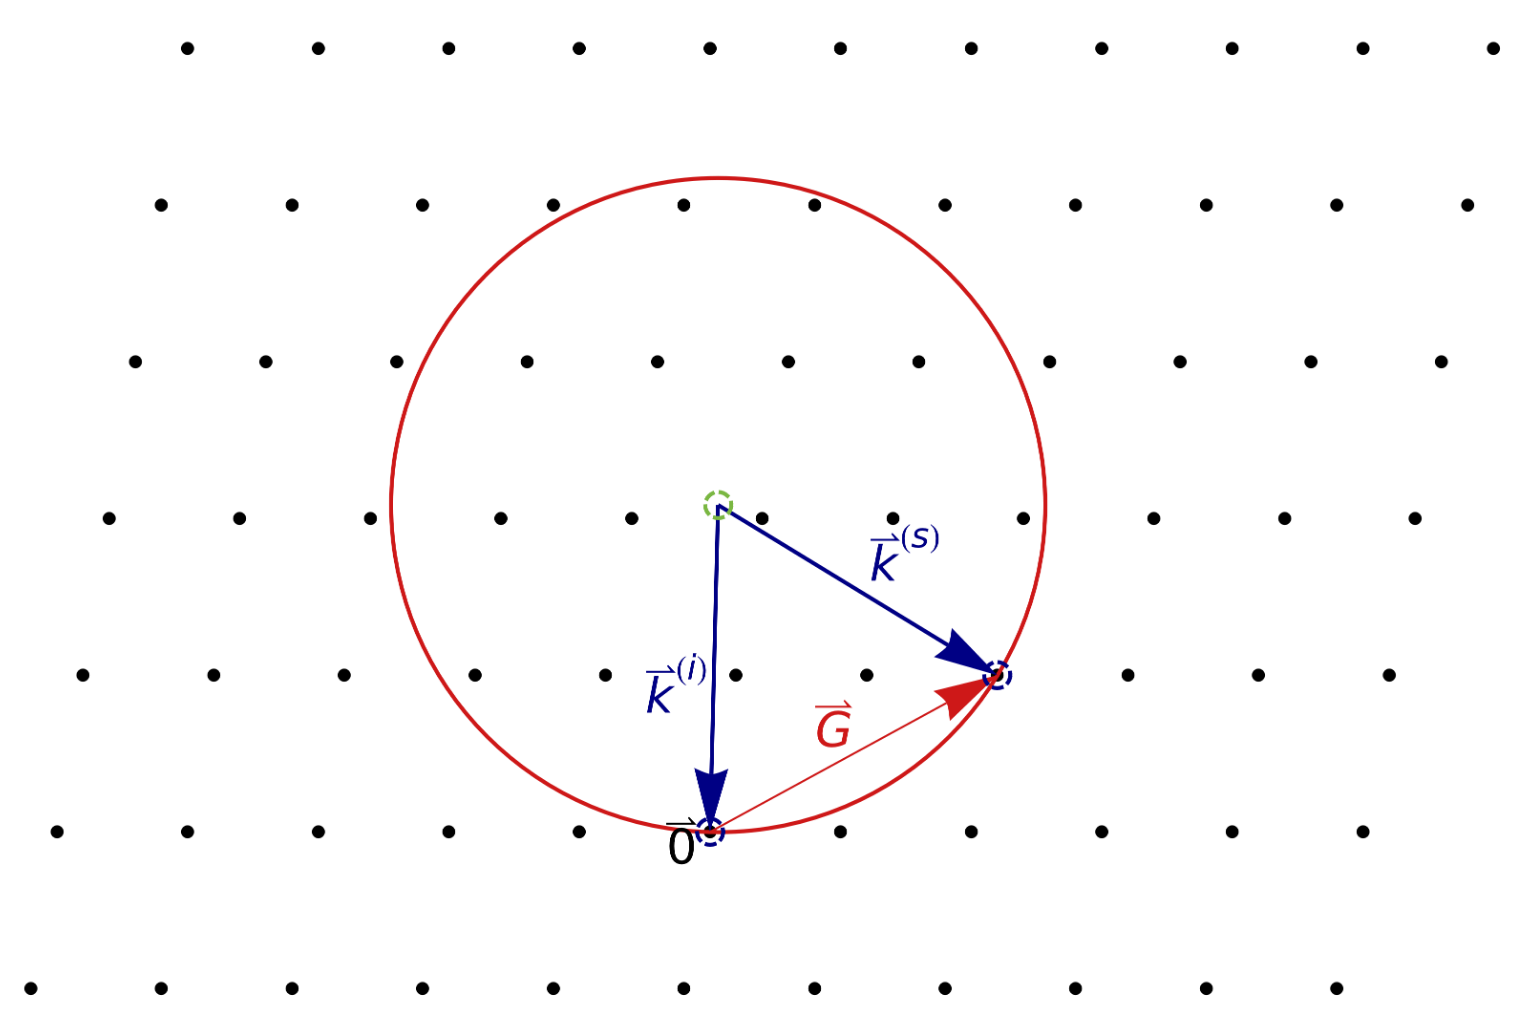</div>

In [288]:
import ipywidgets as iw
import matplotlib.pyplot as plt
from math import *
import numpy as np




In [289]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def length(self):
        return sqrt(self.x*self.x + self.y * self.y)
    
    def length_sq(self):
        return self.x*self.x + self.y * self.y
    
    def __mul__(self, s):
        return Vector(self.x * s, self.y * s)
    
    def __rmul__(self, s):
        return self * s
    
    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)
    
    def rotate(self, phi):
        return Vector(self.x * cos(phi) + self.y * (-sin(phi)), self.x * sin(phi) + self.y * cos(phi))
    
    @staticmethod
    def fromAbsPhi(r, phi):
        x = r * cos(phi)
        y = r * sin(phi)
        return Vector(x, y)

In [290]:
#b reziprokes gitter 2d abbildung
b1 = Vector(2,0)
b2 = Vector(0,2)

angle = 50*pi/180

lambda_ = 0.5
light_vec = Vector.fromAbsPhi(1/lambda_, 0)


In [298]:
# plot
def draw(alpha, lambda_, b2_mag, b2_phi):
    light_vec = Vector.fromAbsPhi(1/lambda_, 0)
    angle = alpha / 180.0 * pi
    b2 = Vector.fromAbsPhi(b2_mag, b2_phi/180.0 * pi)
    fig, ax = plt.subplots()

    fig.set_size_inches(9, 9, forward=True)

    b1r = b1.rotate(angle)
    b2r = b2.rotate(angle)
    epsilon = 1e-4
    size = 8
    num_1points = int(ceil(2*size / max(abs(b1.y) + abs(b2.y), 0.2)))
    num_2points = int(ceil(2*size / max(abs(b1.x) + abs(b2.x), 0.2)))
    num_2points = max(num_1points, num_2points)
    num_1points = num_2points

    num1 = len(range(-num_1points, num_1points))
    num2 = len(range(-num_2points, num_2points))
    points_x = np.zeros((num1, num2))
    points_y = np.zeros((num1, num2))
    points_all = np.empty((num1, num2), dtype=Vector)

    
    for col in range(-num_1points, num_1points):
        row = (np.arange(-num_2points, num_2points) * b2r)
        points = row + (b1r * col)
        points_x[col,:] = [p.x for p in points]
        points_y[col,:] = [p.y for p in points]
        
        points_all[col,:] = points

    points_all = points_all + light_vec
    l = abs(light_vec.length_sq())
    def distance(p):
        if abs(p.x - light_vec.x) < epsilon and abs(p.y - light_vec.y) < epsilon:
            return float("inf")
        return abs(abs(p.length_sq()) - l)
    closest = min(points_all.flatten(), key= distance)
    print(f"x = {closest.x}")
    print(f"y = {closest.y}")
    print(f"delta = {closest.length() - sqrt(l)}")

    ax.arrow(0, 0, light_vec.x, light_vec.y, head_width=0.25, head_length=0.3, length_includes_head=True, fc='maroon', ec='maroon')
    ax.arrow(0, 0, closest.x, closest.y, head_width=0.25, head_length=0.3, length_includes_head=True, fc='b', ec='b')

    ax.add_patch(matplotlib.patches.Circle( (0, 0), light_vec.length(), fill = False, ec = "black", lw=1))

    ax.scatter(points_x + light_vec.x, points_y + light_vec.y, s=[4])
    ax.scatter([0], [0], s=[4], c = ["r"])
    ax.set(xlim=(-size, size),
           ylim=(-size, size))

    ax.set_aspect(1)
    #ax.set_axis_off()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()
    #alpha= 103, lambda = 0.3: good fit

In [299]:
w = iw.interactive(draw, 
            alpha = iw.IntSlider(min = 0, max = 360, value = 45), 
            lambda_ = iw.FloatSlider(min = 0.2, max = 2, value = 0.5), 
            b2_mag = iw.FloatSlider(min = 0.5, max = 4, value = 2.0, continuous_update=False),
            b2_phi = iw.IntSlider(min = 0, max = 360, value = 90, continuous_update=False))
output = w.children[-1]
output.layout.height = '650px'
display(w)

interactive(children=(IntSlider(value=45, description='alpha', max=360), FloatSlider(value=0.5, description='l…